## Handwritten Digit Recognizer using Deep Learning:

In this project, we will try to identify hand written digits by using the power of deep learning.
We will be working on the MNIST dataset to create a deep learning classification model & see how our model performs in acurately predicting images with the correct digit notation.

MNIST is a database of handwritten digits made up of a training set of 60,000 examples, and a test set of 10,000 examples. The training examples are annotated by humans with the correct answer. For instance, if the handwritten digit is the number "3", then 3 is simply the label associated with that example.

We will train our model with the samples available in the training set, and then use the test set to evaluate how well our neural network has learned to recognize digits. 

Let's create a Convolutional Neural Network to solve this problem.

### Install Required Packages

In [2]:
%pip install pandas keras tensorflow numpy matplotlib seaborn

  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.55.6-cp311-cp311-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Libraries:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

%matplotlib inline

In [2]:
tf.__version__

'2.18.0'

### Import MNIST Dataset:

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (60000, 28, 28)
Shape of X_test :  (10000, 28, 28)
Shape of y_train :  (60000,)
Shape of y_test :  (10000,)


#### Each MNIST image is in grayscale and consists of 28*28 pixels.

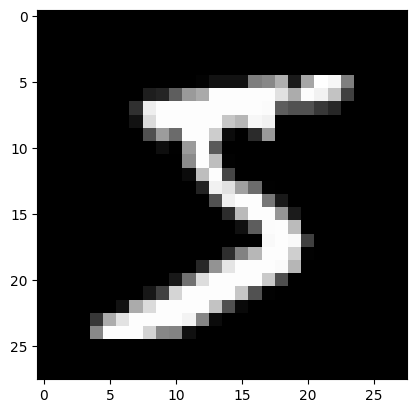

In [7]:
# Normalizing the data and using the PIL library to display the image
from PIL import Image

img = Image.fromarray(X_train[0])
img.show()

# using matplotlib
plt.imshow(X_train[0], cmap='gray')

### Load Sample images from the MNIST dataset:

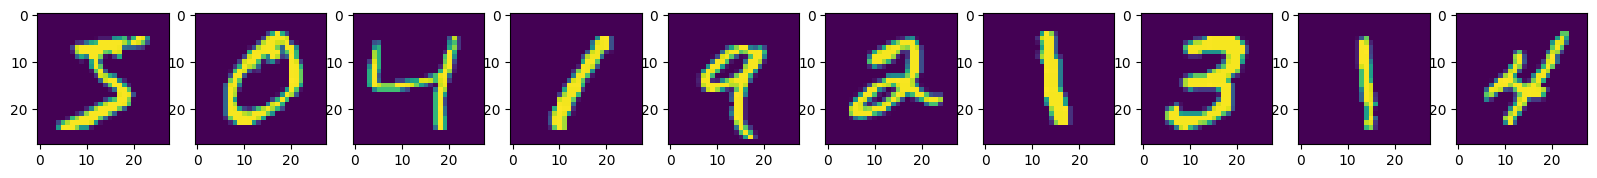

In [8]:
plt.figure(figsize=(20,20))

plt.subplot(1,10,1)
plt.imshow(X_train[0])
plt.subplot(1,10,2)
plt.imshow(X_train[1])
plt.subplot(1,10,3)
plt.imshow(X_train[2])
plt.subplot(1,10,4)
plt.imshow(X_train[3])
plt.subplot(1,10,5)
plt.imshow(X_train[4])
plt.subplot(1,10,6)
plt.imshow(X_train[5])
plt.subplot(1,10,7)
plt.imshow(X_train[6])
plt.subplot(1,10,8)
plt.imshow(X_train[7])
plt.subplot(1,10,9)
plt.imshow(X_train[8])
plt.subplot(1,10,10)
plt.imshow(X_train[9])

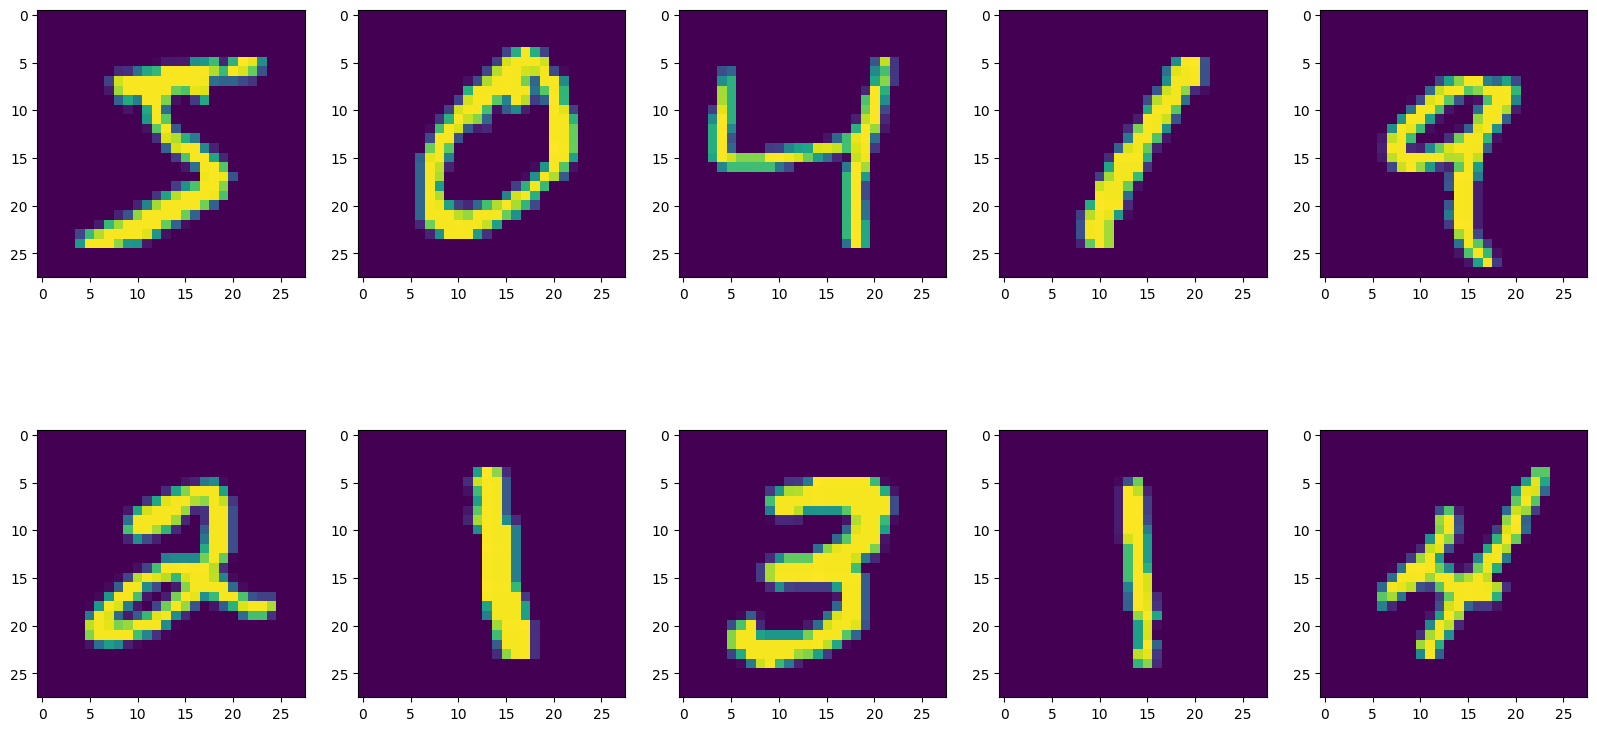

In [9]:
plt.figure(figsize=(20,20))

plt.subplot(1,5,1)
plt.imshow(X_train[0])
plt.subplot(1,5,2)
plt.imshow(X_train[1])
plt.subplot(1,5,3)
plt.imshow(X_train[2])
plt.subplot(1,5,4)
plt.imshow(X_train[3])
plt.subplot(1,5,5)
plt.imshow(X_train[4])
plt.subplot(2,5,6)
plt.imshow(X_train[5])
plt.subplot(2,5,7)
plt.imshow(X_train[6])
plt.subplot(2,5,8)
plt.imshow(X_train[7])
plt.subplot(2,5,9)
plt.imshow(X_train[8])
plt.subplot(2,5,10)
plt.imshow(X_train[9])

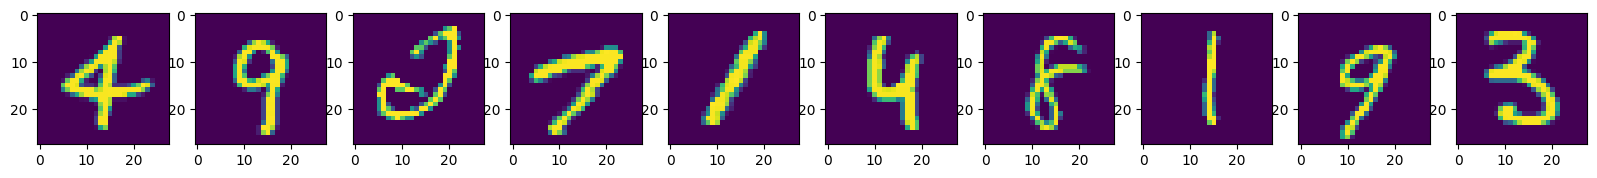

In [10]:
plt.figure(figsize=(20,20))

plt.subplot(1,10,1)
plt.imshow(X_train[150])
plt.subplot(1,10,2)
plt.imshow(X_train[162])
plt.subplot(1,10,3)
plt.imshow(X_train[178])
plt.subplot(1,10,4)
plt.imshow(X_train[193])
plt.subplot(1,10,5)
plt.imshow(X_train[205])
plt.subplot(1,10,6)
plt.imshow(X_train[3978])
plt.subplot(1,10,7)
plt.imshow(X_train[456])
plt.subplot(1,10,8)
plt.imshow(X_train[7896])
plt.subplot(1,10,9)
plt.imshow(X_train[57])
plt.subplot(1,10,10)
plt.imshow(X_train[31897])

### Data Preprocessing:

The image data cannot be fed directly into the model. 
So we need to perform some operations and process the data to make it ready for our neural network. 
The dimension of the training data is (60000,28,28). 
The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).
This extra dimension is for the color channel, for grayscale images like MNIST, its value is 1.
For color images, the channel value is 3 corresponding to Red, Green & Blue (RGB).

In [11]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)

Shape of X_train :  (60000, 28, 28)
Shape of X_test :  (10000, 28, 28)


In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

input_shape = (28,28,1)

print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)

Shape of X_train :  (60000, 28, 28, 1)
Shape of X_test :  (10000, 28, 28, 1)


### One Hot Encoding of target labels:

We are going to use OHE as a simple tool to encode information used inside neural networks. 
In many applications it is convenient to transform categorical (non-numerical) features into numerical variables. For instance, the categorical feature "digit" with value d in [0 – 9] can be encoded into a binary vector with 10 positions, which always has 0 value except the d - th position where a 1 is present.

For example, the digit 3 can be encoded as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This type of representation is called One-hot encoding, or sometimes simply one-hot, and is very common in data mining when the learning algorithm is specialized in dealing with numerical functions.

In [13]:
y_train[0:11]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3], dtype=uint8)

In [14]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

y_cat_train[0:11]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

### Scaling feature data:

Neural Networks work well when the feature values lie between 0 to 1.
Hence we will scale the dataset by simply dividing each value by 255.
The values for each pixel in case of gray scale images range from 0 (white) to 255 (black).

In [15]:
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [16]:
X_train = X_train.astype('float32')   # converting the data to float type
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [17]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Model Creation:

Now we will create our CNN model. 
A CNN model generally consists of convolutional and pooling layers. It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems.

In [18]:
model = Sequential()  # creating a sequential model instance 

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape)) # adding a convolutional layer with 32 output channels, 3x3 kernel size and relu activation function. this is the first layer 
#so we need to specify the input shape
model.add(Conv2D(64, (3, 3), activation='relu')) # adding a convolutional layer with 64 output channels, 3x3 kernel size and relu activation function
model.add(MaxPool2D(pool_size=(2, 2))) # adding a maxpooling layer to reduce the spatial dimensions of the output volume
model.add(Dropout(0.25)) # adding a dropout layer to prevent overfitting 25% of the neurons will be dropped out/deactivated
model.add(Flatten()) # flattening the output volume into a 1D array

model.add(Dense(256, activation='relu')) # a fully connected layer with 256 neurons and relu activation function
model.add(Dropout(0.25)) # adding a dropout layer to prevent overfitting and ensure good model regularization 25% of the neurons will be dropped out/deactivated
model.add(Dense(10, activation='softmax')) # a fully connected layer with 10 neurons which is equal to the number of class predictions and softmax activation function

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy']) # compiling the model with categorical crossentropy loss function, adam optimizer and accuracy as the metric

c:\Users\adontoh\Desktop\DigitRec\digit\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Summary:

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,380,938 (9.08 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

### Adding Early Stopping:

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=2) # early stopping to prevent overfitting. it will stop the training if the validation loss does not decrease after 2 epochs

### Model Training:

In [21]:
model.fit(X_train, y_cat_train, epochs=50, callbacks = [early_stop], validation_data=(X_test, y_cat_test))

print("The model has successfully trained")
model.save('mnist.h5') # saving the model to avoid retraining the model again and again
print("Saving the model as mnist.h5")

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9187 - loss: 0.2637 - val_accuracy: 0.9792 - val_loss: 0.0618
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9847 - loss: 0.0502 - val_accuracy: 0.9874 - val_loss: 0.0355
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9901 - loss: 0.0323 - val_accuracy: 0.9896 - val_loss: 0.0344
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9925 - loss: 0.0239 - val_accuracy: 0.9905 - val_loss: 0.0306
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9914 - val_loss: 0.0292
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9963 - loss: 0.0122 - val_accuracy: 0.9902 - val_loss: 0.0311
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9952 - loss: 0.0125 - val_accuracy: 0.9910 - val_loss: 0.0310


The model has successfully trained
Saving the model as mnist.h5


### Model Performance during training & validation:

In [22]:
training_metrics = pd.DataFrame(model.history.history)
training_metrics.columns

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

In [23]:
training_metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.960867,0.128359,0.9792,0.061830
1,0.985183,0.047427,0.9874,0.035497
2,0.989967,0.031921,0.9896,0.034409
3,0.992133,0.024380,0.9905,0.030581
4,0.993383,0.020492,0.9914,0.029153


<Axes: >

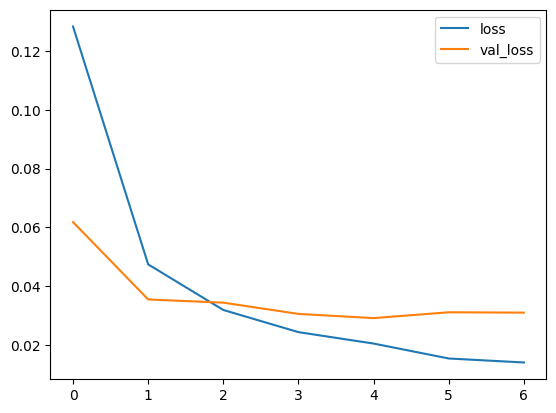

In [24]:
training_metrics[['loss','val_loss']].plot()

<Axes: >

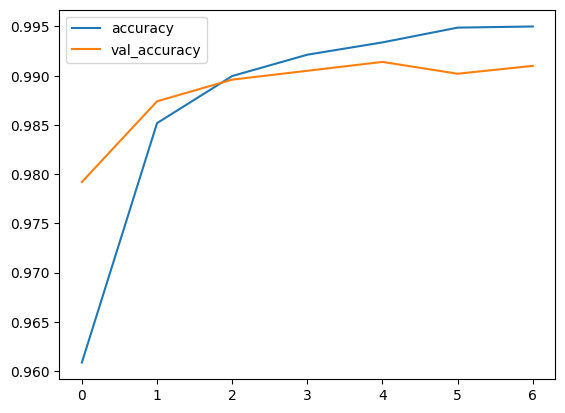

In [25]:
training_metrics[['accuracy','val_accuracy']].plot()

In [26]:
score = model.evaluate(X_test, y_cat_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.031015334650874138
Test accuracy: 0.9909999966621399


### Model Predictions:

In [27]:
predictions = np.argmax(model.predict(X_test), axis=-1)  # predicting the class labels for the test set axis = -1 means the last axis

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [29]:
print(confusion_matrix(y_test, predictions))

[[ 975    0    0    0    0    0    3    1    0    1]
 [   0 1132    0    1    0    1    1    0    0    0]
 [   1    1 1021    1    0    0    0    7    1    0]
 [   0    0    0 1007    0    2    0    1    0    0]
 [   0    1    1    0  969    0    3    2    0    6]
 [   1    0    0    4    0  884    2    0    1    0]
 [   3    2    0    1    1    1  949    0    1    0]
 [   0    3    4    0    0    0    0 1018    1    2]
 [   2    1    2    1    1    0    0    2  961    4]
 [   0    0    1    2    4    4    0    3    1  994]]


### Visualizing confusion matrix:

<Axes: >

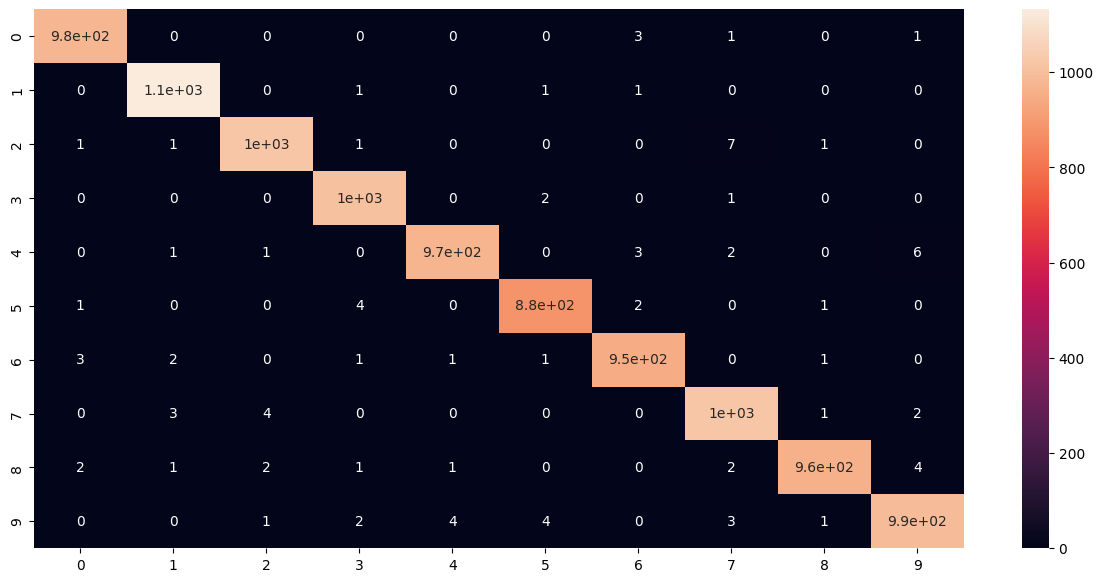

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

### Predicting individual images:

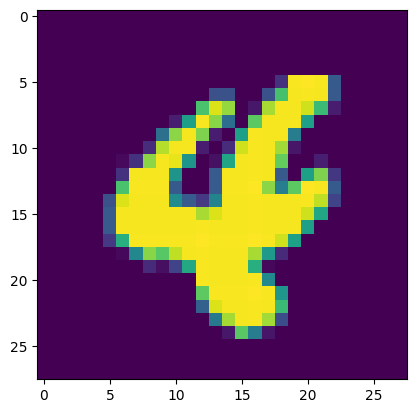

In [31]:
new_img = X_test[95]
plt.imshow(new_img)

In [32]:
y_test[95]

np.uint8(4)

np.uint8(8)

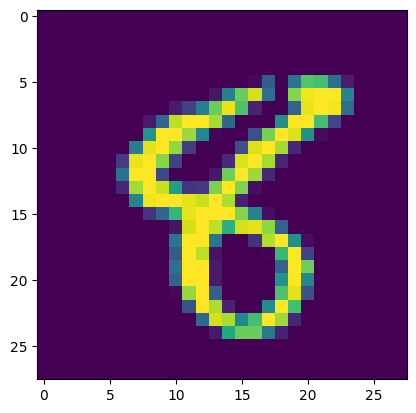

In [33]:
new_img1 = X_test[84]
plt.imshow(new_img1)
y_test[84]

In [34]:
np.argmax(model.predict(new_img.reshape(1,28,28,1)), axis=-1) # (1,28,28,1) is the shape of the input image with 1 sample, 28x28 pixels and 1 channel

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([4])

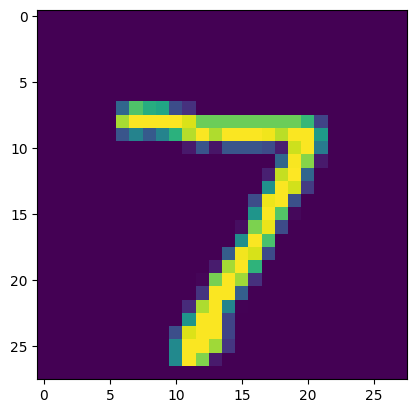

In [35]:
new_img2 = X_test[0]
plt.imshow(new_img2)

In [36]:
y_test[0]

np.uint8(7)

In [37]:
np.argmax(model.predict(new_img2.reshape(1,28,28,1)), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([7])

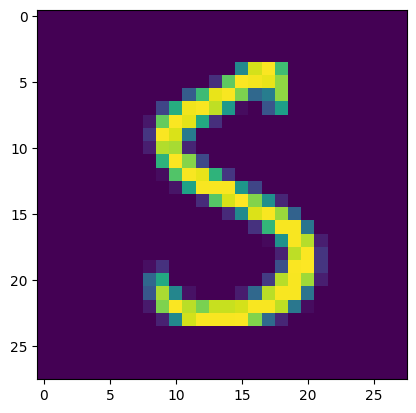

In [38]:
new_img3 = X_test[397]
plt.imshow(new_img3)

In [39]:
y_test[397]

np.uint8(5)

In [40]:
np.argmax(model.predict(new_img3.reshape(1,28,28,1)), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([5])